In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import imageio
from skimage.transform import resize
%matplotlib inline

### You are given a dataset ("data.h5") containing:
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
print("Feature shape: {}".format(train_set_x_orig.shape))
print("Label shape: {}".format(train_set_y.shape))

Feature shape: (209, 64, 64, 3)
Label shape: (1, 209)


y= [1] is a cat image


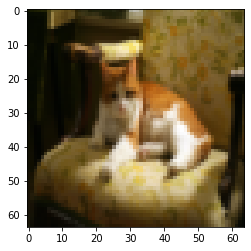

In [4]:
# example of a image
index = 7
plt.imshow(train_set_x_orig[index])
print('y= {} is a cat image'.format(train_set_y[:,index]))

In [5]:
# check some values for m_train, m_test, num_px=height/width of the image
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
# reshape the training and test data, so that images of 
# size (num_px, num_px, 3) are flattened into single vectors 
# of shape (num_px*num_px*3,1)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [7]:
# standardize data set 
# To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, 
# and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

### train a logistc regression 


In [8]:
# sigmoid function
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

# initializing parameters
def initializing_with_zeros(d):
    w = np.zeros((d,1))
    b = 0
    return w,b

# forward propagation
# Arguments:
# w -- weights, d x 1
# b -- bias, a scalar
# X -- data of size d x m
# Y -- label vector: 1 x m
def propagate(w,b,X,Y):
    # forward propagation
    m = X.shape[1] 
    Z = np.dot(w.T,X)+b
    A = sigmoid(Z)
    # loss
    L = -(Y*np.log(A)+(1-Y)*np.log(1-A))
    # cost
    J = np.sum(L)/m
    
    # backward propagation
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    
    grads = {"dw":dw, "db":db}
    return grads,J

# test 
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [9]:
# optimization function for gradient descent
# Arguments:
# w -- weights, d x 1
# b -- bias, a scalar
# X -- data of size d x m
# Y -- label vector: 1 x m
# epoch -- number of training times
# eta -- learning rate
def optimize(w,b,X,Y,num_epoch,eta,print_cost=False):
    # This function optimizes w and b by running a gradient descent algorithm
    costs = []
    for epoch in range(num_epoch):
        grads,J = propagate(w,b,X,Y)
        # compute dw and db
        dw = grads['dw']
        db = grads['db']
        
        # updating w and b
        w = w-eta*dw
        b = b-eta*db
        
        # record cost
        costs.append(J)
        # print cost every 100 training
        if print_cost and epoch % 100 == 0:
            print ("Cost after iteration %i: %f" %(epoch, J))
        
        # save results
        params = {"w": w,"b": b}
        grads = {"dw": dw,"db": db}
    return params, grads, costs
params, grads, costs = optimize(w,b,X,Y,num_epoch= 100, eta = 0.009,print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [10]:
# prediction
# Arguments:
# w -- weights, d x 1
# b -- bias, a scalar
# X -- data of size d x m
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction = np.round(A)
    return Y_prediction
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


### Merge all functions into a model

In [11]:
# implement model fumction based on notation
# - y_prediction_test for your predictions on the test set
# - y_prediction_train for your predictions on the train set
# - w, costs, grads for the outputs of optimize()

# X_train -- training feature, d x m1
# y_train -- training label, 1 x m1
# X_test -- training feature, d x m2
# y_test -- training label, 1 x m2
# num_epoch -- number of traning times
# eta -- learning rate
# print_cost -- set to true to print the cost every 100 iterations
# Returns:
# d -- dictionary containing information about the model.
def model(X_train,y_train,X_test,y_test,num_epoch = 2000,eta = 0.5,print_cost = False):
    # initialize weight and bias 
    # w: d x 1
    # b: scalar
    w,b = initializing_with_zeros(X_train.shape[0])
    
    # gradient descent
    params, grads, costs = optimize(w,b,X_train,y_train,num_epoch,eta,print_cost=True)
    w = params['w']
    b = params['b']
    
    # predict train/test
    y_prediction_train = predict(w,b,X_train)
    y_prediction_test = predict(w,b,X_test)
    
    # print results
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    
    # pack results information of model
    d = {"costs": costs,
         "y_prediction_train": y_prediction_train,
         "y_prediction_test": y_prediction_test,
         "w": w,
         "b": b,
         "eta": eta,
         "num_epoch": num_epoch
        }
    return d

d = model(train_set_x,train_set_y,test_set_x,test_set_y,num_epoch=5000,eta =0.005,print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

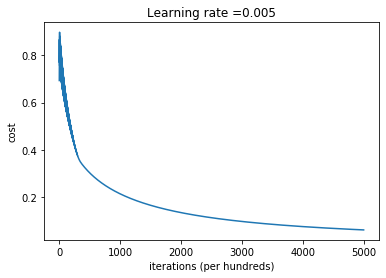

In [12]:
# plot learning curve
costs = np.array(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["eta"]))
plt.show()

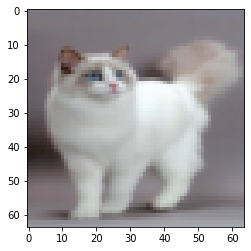

In [13]:
# testing with my own image
my_image = 'mycat.jpg'
image = np.array(imageio.imread(my_image))
image_data = resize(image,output_shape=(num_px,num_px))
# show image_data
plt.imshow(image_data)
plt.show()

In [14]:
# preprocessing the image data to fit model
test_image = image_data.reshape(1,image_data.shape[0]*image_data.shape[1]*image_data.shape[2]).T

# predict
predict_image = predict(d['w'],d['b'],test_image)
print('prediction result: {} (1 is a cat)'.format(predict_image[0][0]))

prediction result: 1.0 (1 is a cat)
